Clustering with K-Means and Hierarchical

Source : https://www.kaggle.com/sleymanzeynul/customer-segmentation-kmeans-hierarchical
1. Import Libraries, Load Dataset, Exploring Data
2. Exploratory Data Analysis (EDA)
3. Cluster Analysis : x1 (K-Means, Agglomerative) & x2(K-Means, Agglomerative)

1. Import Libraries, Load Dataset, Exploring Data

In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [7]:
path = "drive/MyDrive/Colab Notebooks/kaggle/"
df=pd.read_csv(path+'Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
#explore the data
df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
print(f"Our dataset consists of {df.shape[0]} rows and {df.shape[1]} columns.")

Our dataset consists of 200 rows and 5 columns.


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
Spending_Score,0,0.0
Annual_Income,0,0.0
Age,0,0.0
Gender,0,0.0
CustomerID,0,0.0


In [14]:
df.duplicated().sum()

0

In [15]:
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [16]:
#Since CustomerID column has nothing to do with our segmentation we have just dropped that colum
df.drop(columns= "CustomerID", inplace=True)
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [17]:
df.nunique()

Gender             2
Age               51
Annual_Income     64
Spending_Score    84
dtype: int64

2.Exploratory Data Analysis (EDA)

After performing Cluster Analysis, we need to know the data well in order to label the observations correctly. We will 

a) analyze frequency distributions of features

b) relationships and correlations between the independent variables and the dependent variable. 

c) Apply data visualization techniques. Observing breakpoints helps us to 
internalize the data.

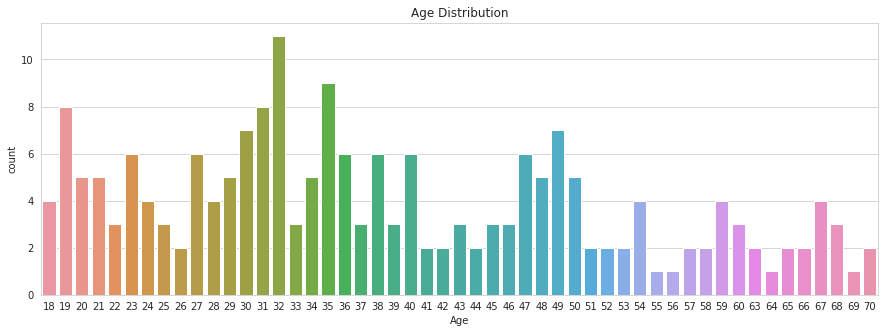

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(x ='Age', data = df)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show();

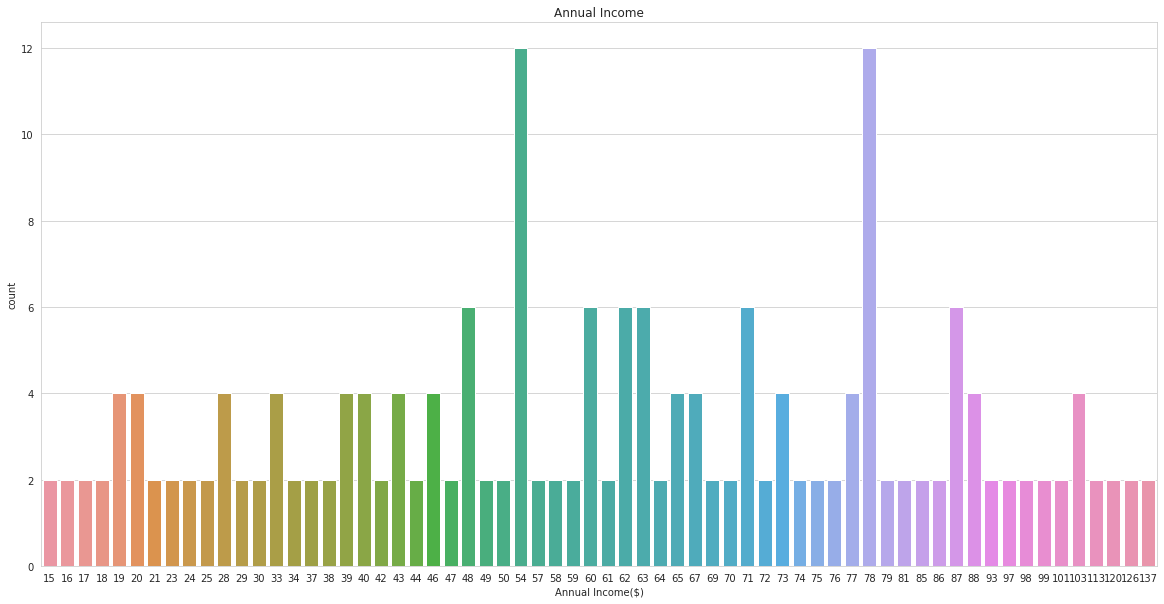

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(x='Annual_Income', data=df)
plt.title('Annual Income')
plt.xlabel('Annual Income($)')
plt.show();

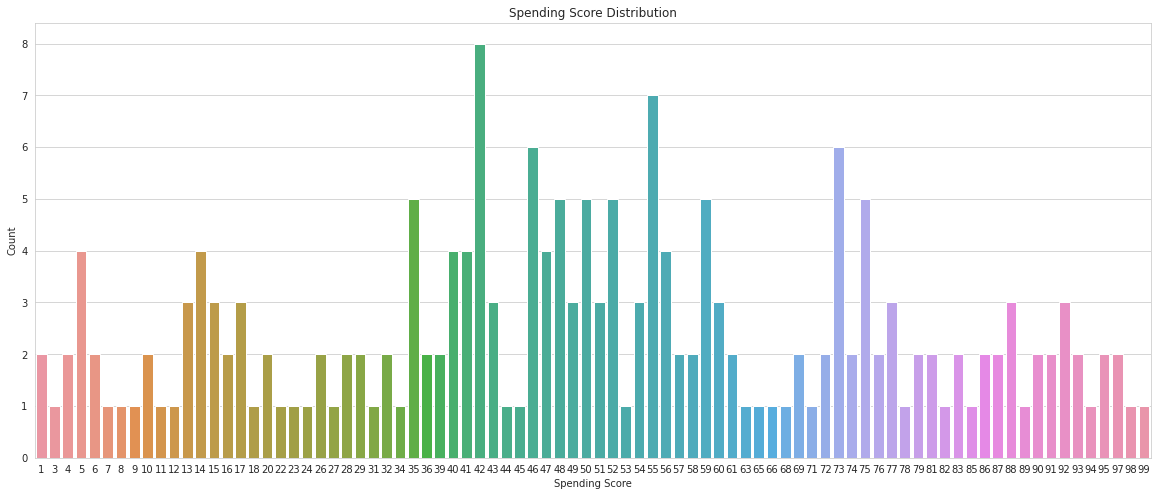

In [20]:
plt.figure(figsize=(20,8))
sns.countplot(x='Spending_Score', data=df)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.show();

Text(0, 0.5, 'Count')

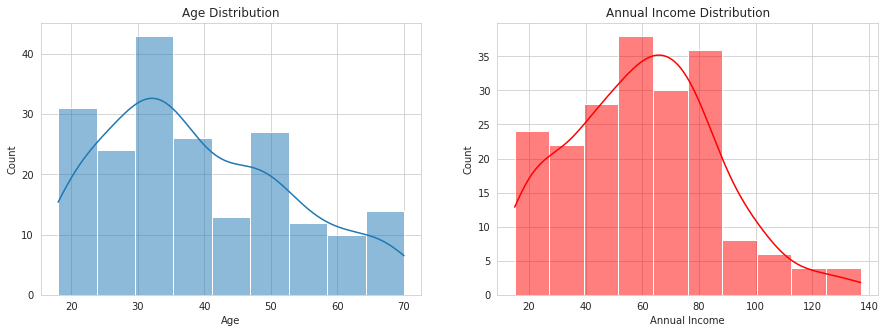

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x='Age', data=df, kde =True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.histplot(x ='Annual_Income', data=df, color='red', kde = True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')

(-1.25, 1.25, -1.25, 1.25)

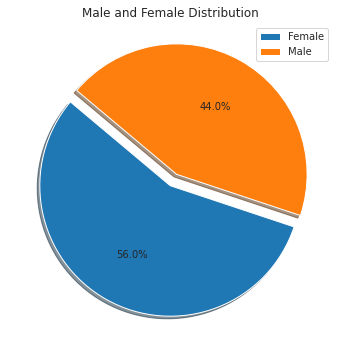

In [22]:
plt.figure(figsize=(6,6))

explode = [0,0.1]
plt.pie(df['Gender'].value_counts(), explode=explode,autopct='%1.1f%%', shadow=True,startangle=140)
plt.legend(labels=['Female','Male'])
plt.title('Male and Female Distribution')
plt.axis('off')

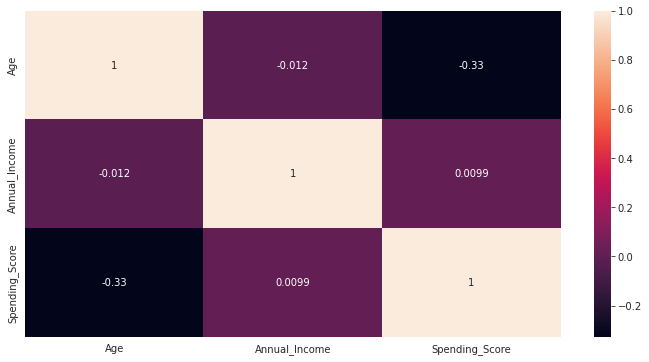

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

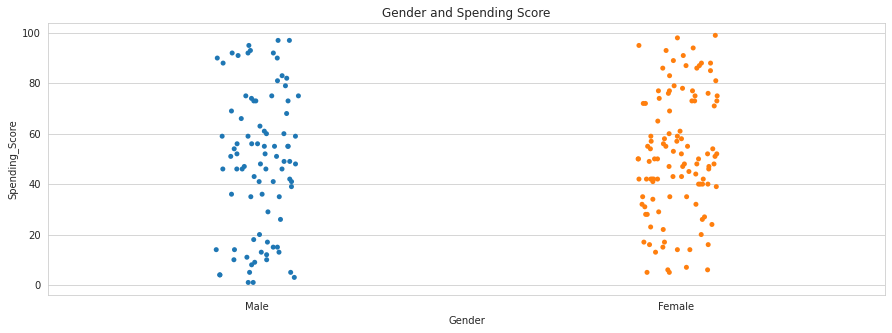

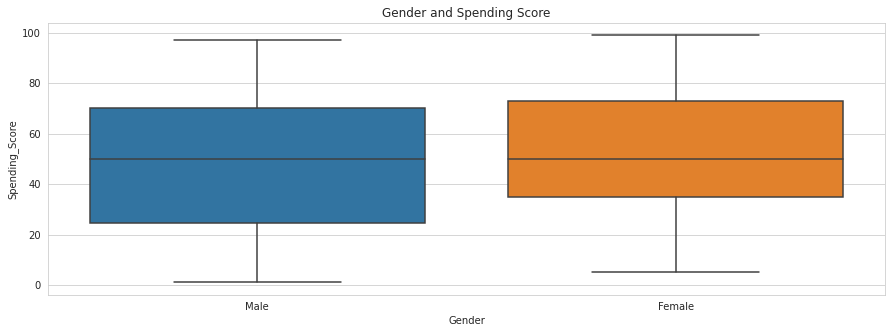

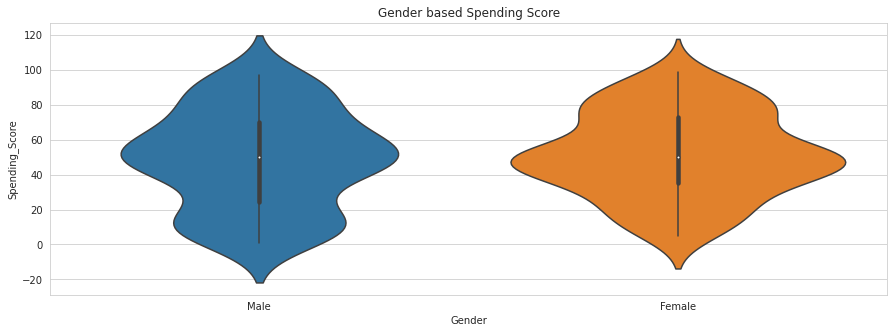

In [24]:
plt.figure(figsize=(15,5))
sns.stripplot(x='Gender', y='Spending_Score', data=df)
plt.title('Gender and Spending Score')
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x='Gender', y='Spending_Score', data=df)
plt.title('Gender and Spending Score')
plt.show()

plt.figure(figsize=(15,5))
sns.violinplot(x='Gender', y='Spending_Score', data=df)
plt.title('Gender based Spending Score')
plt.show()

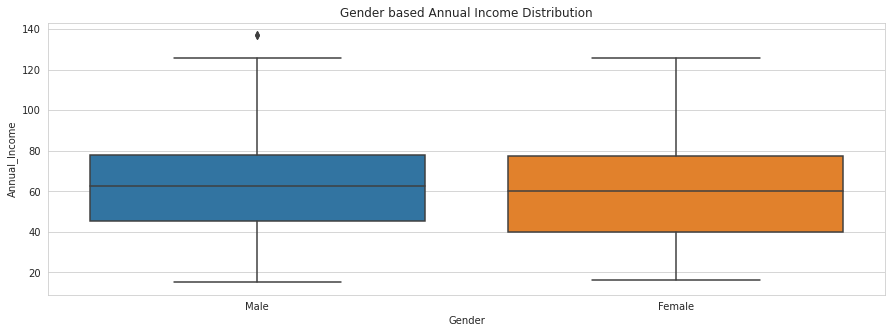

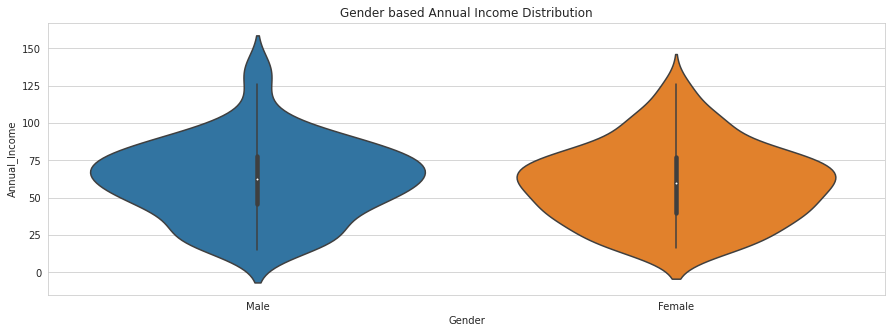

In [25]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Gender',y='Annual_Income', data=df)
plt.title('Gender based Annual Income Distribution')
plt.show()

plt.figure(figsize=(15,5))
sns.violinplot(x='Gender',y='Annual_Income', data=df)
plt.title('Gender based Annual Income Distribution')
plt.show()



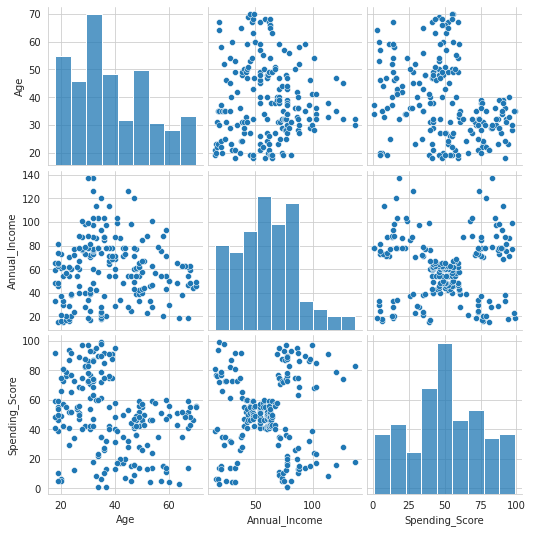

In [26]:
sns.pairplot(df);

In [ ]:
# Based on our observation on Annual_Income vs. Spending_Score, we may have 5 custers for the given dataset.

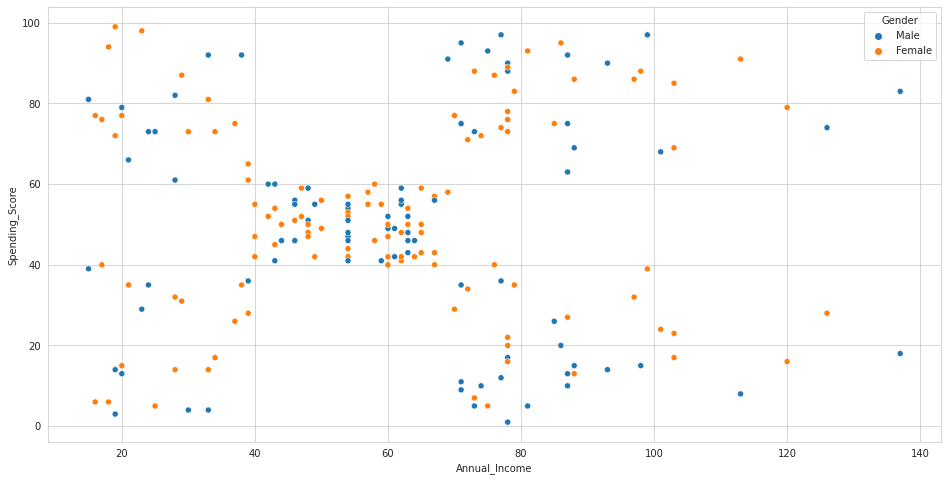

In [27]:
plt.figure(figsize=(16,8))

sns.scatterplot(x ='Annual_Income', y='Spending_Score', data=df, hue = "Gender")
plt.show()

#3. Cluster Analysis



  # A. x1 = Age and Spending Score
  3.a.i. Create a new dataset with two variables of your choice

In [28]:
#K_Means

df_2 = df.drop(columns="Gender")
#Since Gender column bsically consists of 0 and 1, we dropped it due to fact that it is not suitable for clustering. We will add it to our analysis later on.

In [29]:
!pip install pyclustertend

In [30]:
from pyclustertend import hopkins
hopkins(df_2, df_2.shape[0])
#pyclustertend is a python package specialized in cluster tendency. Cluster tendency consist to assess if clustering algorithms are relevant for a dataset.
#A dataset with Hopkins score lower than 0.5 means that given dataset is suitable for clustering


0.32259845780695373

In [31]:
x1 = df.loc[:,['Age','Spending_Score']]
x1.head()

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [32]:
df_2.head()

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [34]:
#do it again, is it better ?
hopkins(x1, x1.shape[0])

0.28748538733486634

3.a.ii. Determine optimal number of clusters

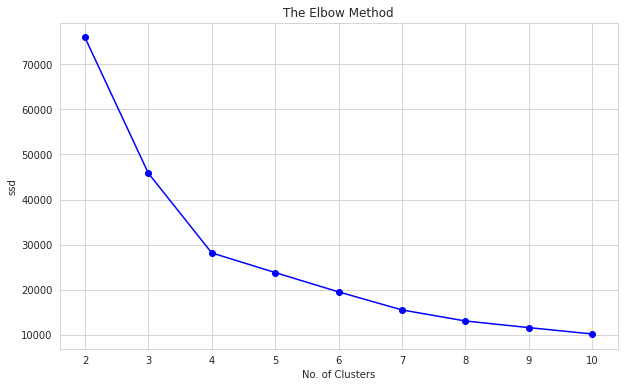

In [35]:
# The Elbow Method

from sklearn.cluster import KMeans

ssd =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n,random_state=42)
    kmeans.fit(x1)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), ssd, "bo-")
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('ssd')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


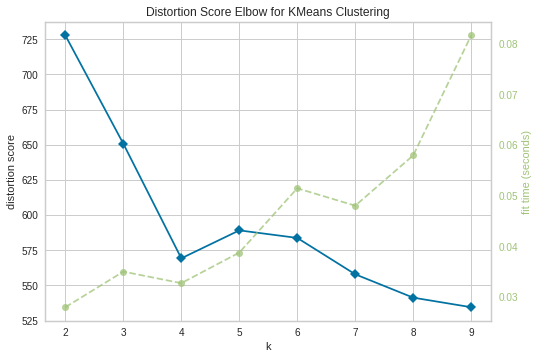

In [36]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(x1)
visu.poof()

In [37]:
#Sillhouette Score
#chek the highest number 
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(x1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(x1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.4460311217292306
For n_clusters=6, the silhouette score is 0.44571861960523285
For n_clusters=7, the silhouette score is 0.4212938931368575
For n_clusters=8, the silhouette score is 0.4280512526200285
For n_clusters=9, the silhouette score is 0.41005073784378454
For n_clusters=10, the silhouette score is 0.41413727749856316


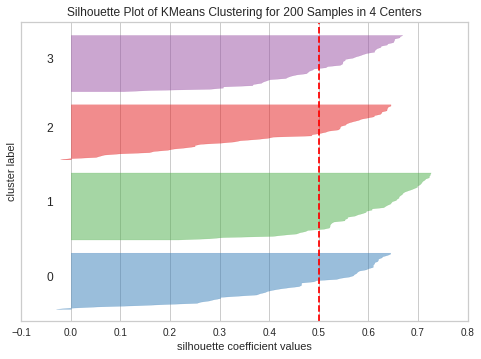

In [38]:
#plotting the Silhoouette
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(x1)    # Fit the data to the visualizer
visualizer.poof();

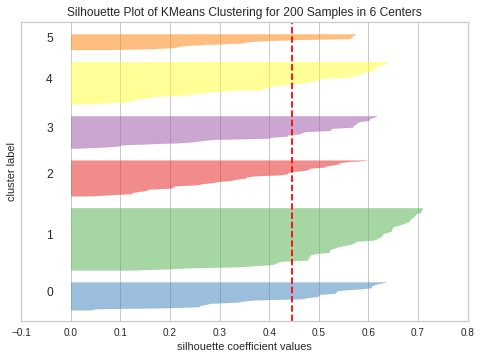

In [39]:
#plotting the Silhoouette
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=6, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(x1)    # Fit the data to the visualizer
visualizer.poof();

3.a.iii. Apply K Means


In [40]:
kmeans = KMeans(n_clusters = 4, random_state=42)
kmeans.fit_predict(x1)

array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 3, 2,
       0, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 1, 3, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [41]:
x1["cluster_Kmeans"] = kmeans.fit_predict(x1)
x1.head()

,Age,Spending_Score,cluster_Kmeans
0,19,39,2
1,21,81,1
2,20,6,0
3,23,77,1
4,31,40,2


3.a.iv. Visualizing and Labeling All the Clusters

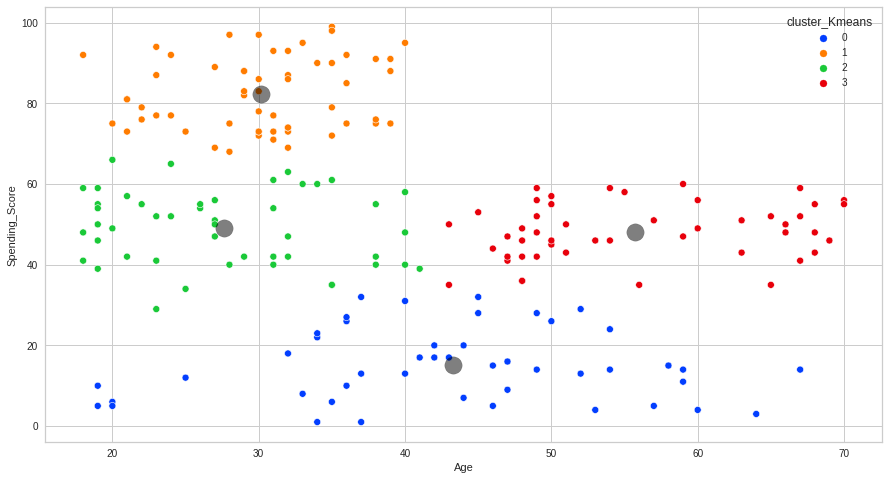

In [42]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Kmeans', data=x1, palette="bright")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5);

3.b.i Hierarchical Clustering

In [47]:
# i. Determine optimal number of clusters using Dendogram
# The linkage methods work by calculating the distances or similarities between all objects. 
# Then the closest pair of clusters are combined into a single cluster, reducing the number of clusters remaining.
# The process is then repeated until there is only a single cluster left

from scipy.cluster.hierarchy import linkage
hc_ward = linkage(y = x1, method = "ward")
hc_complete = linkage(x1, "complete")
hc_average = linkage(x1, "average")
hc_single = linkage(x1, "single")


In [44]:
from scipy.cluster.hierarchy import dendrogram

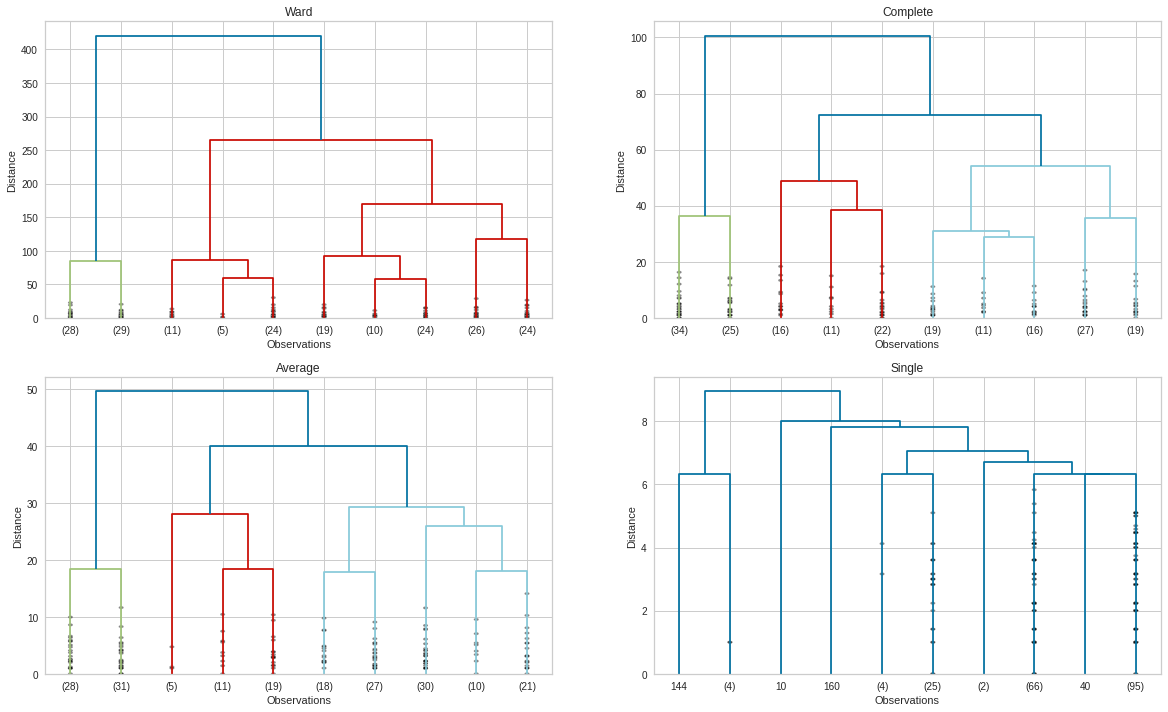

In [48]:
# We tried all linkage parameter values to see the differences among them.
# The bigger the difference, the better cluster we have.
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

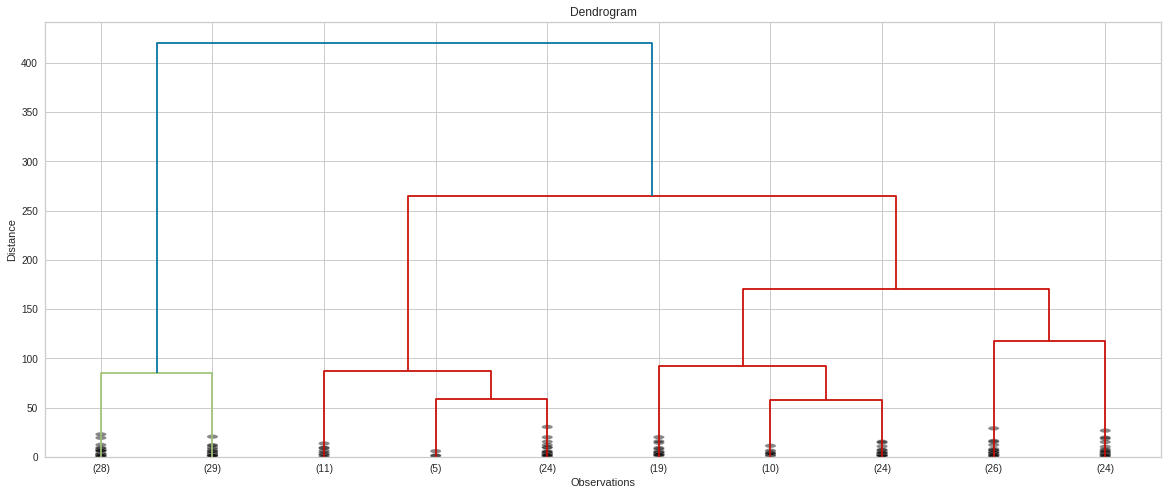

In [49]:
#Based on the distance ranges, we can see that method = "ward" is the best option for us.
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);


In [51]:
from sklearn.cluster import AgglomerativeClustering


In [52]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(x1)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(x1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4546023194486732
For n_clusters=3, the silhouette score is 0.4416017315679834
For n_clusters=4, the silhouette score is 0.46054344327217983
For n_clusters=5, the silhouette score is 0.4042435361101531
For n_clusters=6, the silhouette score is 0.41277212959663445
For n_clusters=7, the silhouette score is 0.41585602002521155
For n_clusters=8, the silhouette score is 0.38827019885537567
For n_clusters=9, the silhouette score is 0.39464283455886673
For n_clusters=10, the silhouette score is 0.38749884836904996


3.b.ii. Apply Agglomerative Clustering - x1 (
Age and Spending Score)


In [57]:
Agg1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_agg= Agg1.fit_predict(x1)

In [71]:
x1['cluster_Agg'] = y_agg
x1.head()

,Age,Spending_Score,cluster_Kmeans,cluster_Agg
0,19,39,2,0
1,21,81,1,3
2,20,6,0,2
3,23,77,1,3
4,31,40,2,0


3.b.iii. Visualizing and Labeling All the Clusters


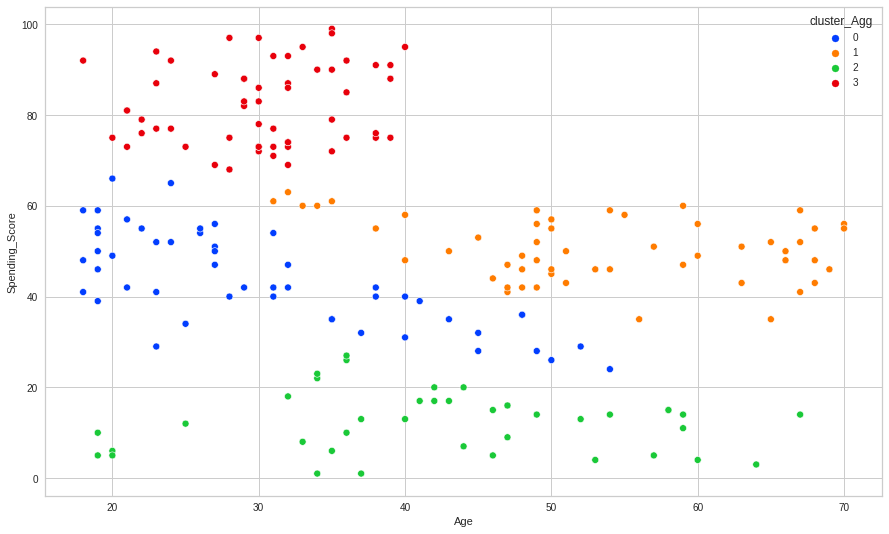

In [60]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Agg', data=x1, palette="bright");


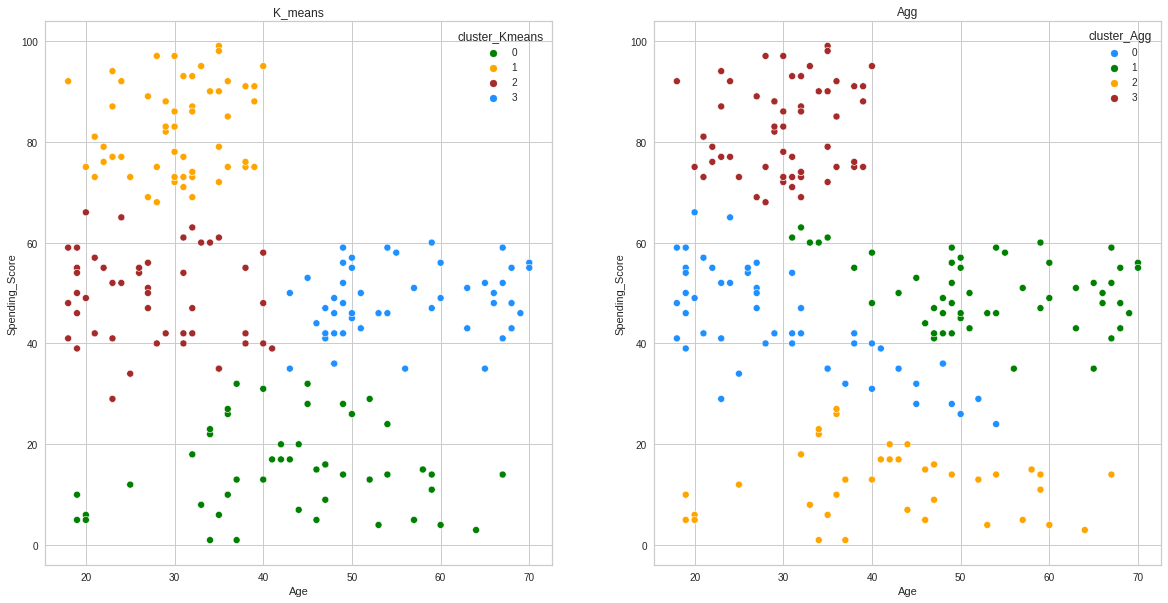

In [61]:
#comparing the clustering K_means and Agglomerative

plt.figure(figsize = (20,10))

#1
plt.subplot(121)
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Kmeans', data=x1,palette=['green','orange','brown',
                                                                             'dodgerblue'])
plt.title("K_means")

#2
plt.subplot(122)
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Agg', data=x1,palette=['dodgerblue','green',
                                                                              'orange','brown'])
plt.title("Agg");

4.a Interpretation based on Age and Spending Score - x1


In [62]:
x1.head()

,Age,Spending_Score,cluster_Kmeans,cluster_Agg
0,19,39,2,0
1,21,81,1,3
2,20,6,0,2
3,23,77,1,3
4,31,40,2,0


In [63]:
x1.cluster_Kmeans.value_counts()

1    57
3    48
0    48
2    47
Name: cluster_Kmeans, dtype: int64

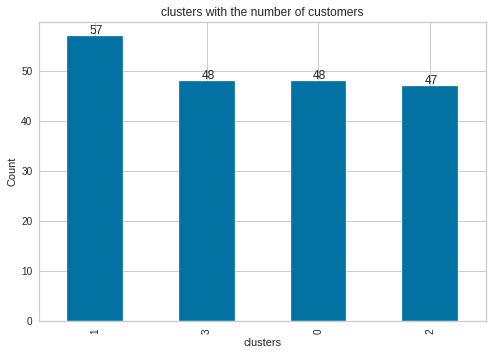

In [64]:
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = x1.cluster_Kmeans.value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +0.2, p.get_height() + 0.5))

In [65]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [66]:
#add the cluster result into original data
df["cluster_Age_Spending_Score"] = x1.cluster_Kmeans
df.head()

,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score
0,Male,19,15,39,2
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,1
4,Female,31,17,40,2


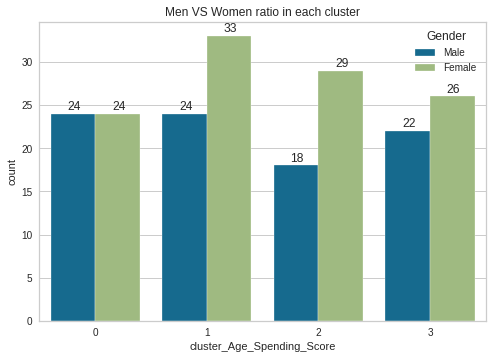

In [67]:
# add gender into the analysis

plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Age_Spending_Score, hue=df.Gender)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +0.15, p.get_height() + 0.5))

In [68]:
df.groupby("cluster_Age_Spending_Score").mean()

,Age,Annual_Income,Spending_Score
cluster_Age_Spending_Score,,,
0,43.291667,66.937500,15.020833
1,30.175439,66.070175,82.350877
2,27.617021,53.276596,49.148936
3,55.708333,54.770833,48.229167


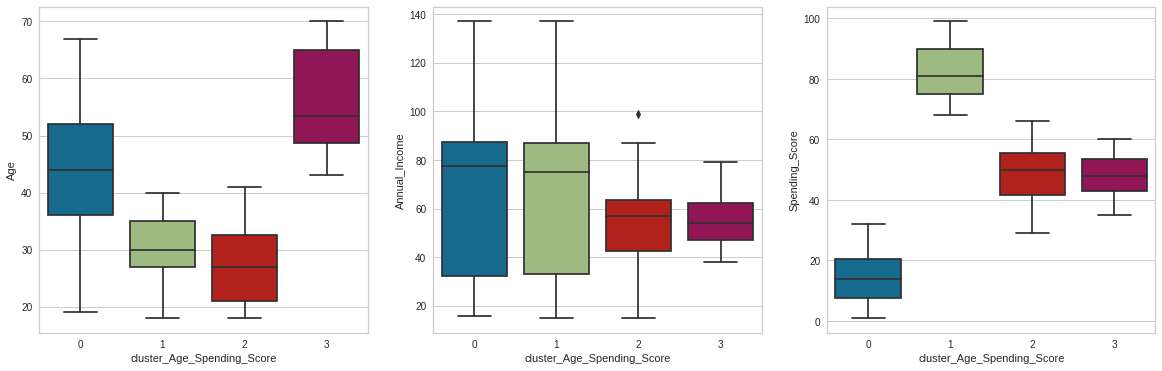

In [69]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "Age", x = "cluster_Age_Spending_Score", data = df)

plt.subplot(132)
sns.boxplot(y = "Annual_Income", x = "cluster_Age_Spending_Score",  data = df)

plt.subplot(133)
sns.boxplot(y = "Spending_Score", x = "cluster_Age_Spending_Score", data = df);

<Figure size 1440x432 with 0 Axes>

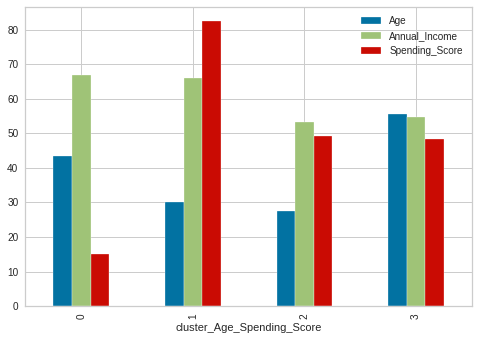

In [70]:
plt.figure(figsize = (20,6))
df.groupby("cluster_Age_Spending_Score").mean().plot(kind='bar')
plt.show();

In [ ]:
# ..and please interpret this result :)

#B. Clustering based on Annual Income and Spending Score - x2

Please continue this part ( ada juga di Kagglenya kok..), jadi akan menghasilkan clustering berdasarkan dua teknik clustering juga

i. Determine optimal number of clusters using Dendogram

ii. Apply Agglomerative Clustering

iii. Visualizing and Labeling All the Clusters

iv. Interpretation based on  (b) Annual income and Spending Score (x2)

In [72]:
# Start by defining the data

x2 = df.loc[:,['Annual_Income','Spending_Score']]
x2.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
